In [30]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from pylab import *
import scipy.stats as sps

In [31]:
# Эмпирическая функция распределения
def foo(arr, x):
    a = arr < x
    if (len(arr)-1) != 0:
        return (len(arr[a]) * 1.0 / (len(arr)-1))
    else:
        if arr[0] < x:
            return 1.0
        else:
            return 0.0

In [32]:
# Выборка размера N из нормального распределения 
N = 10000
s_all = np.random.normal(loc=0.0, scale=1.0, size=N)

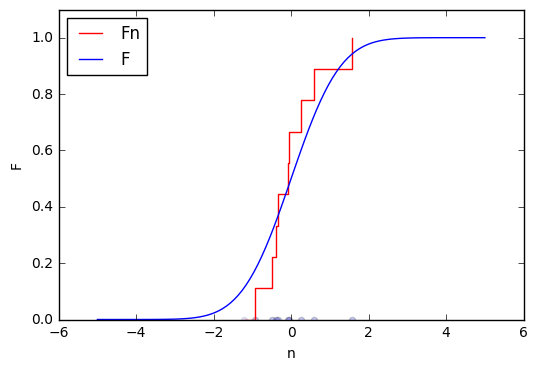

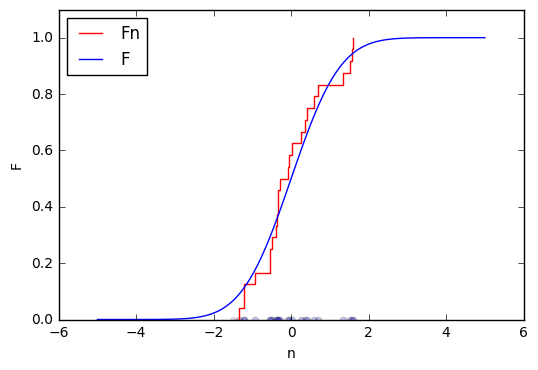

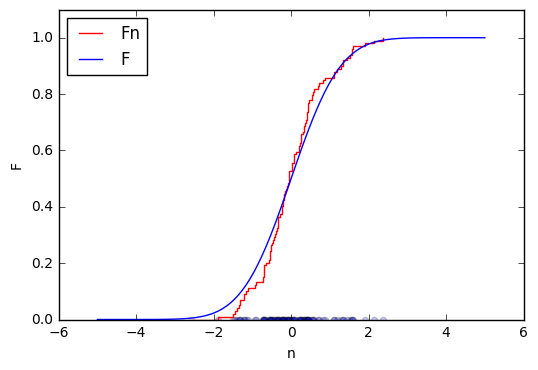

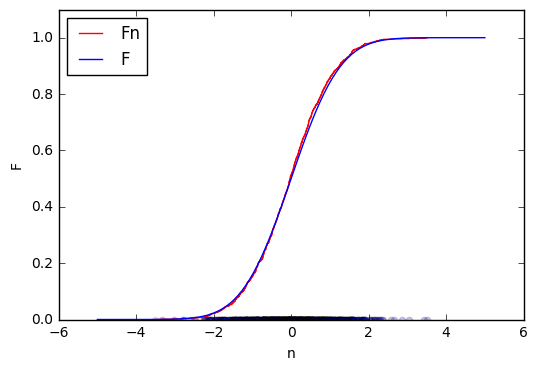

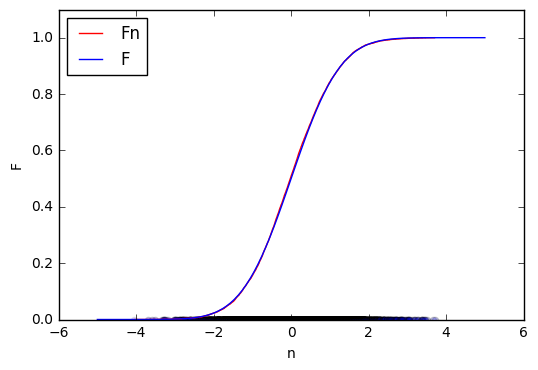

In [33]:
# Построение графика функции распределения
# и эмпирической функции распределения в зависимости от i - числа элементов выборки
a = [10, 25, 100, 1000, N]
for i in a:
    arr = []
    s = s_all[:i]
    s.sort()
    for n in range(1, i + 1):
        if (n > 1):
            arr += [arr[len(arr) - 1]]
        arr += [foo(np.array(s), s[n - 1])]
    s = np.repeat(s, 2)
    s = s[1:]
    ylim(0,1.1)
    plt.plot(s[:i*2], arr, color = 'red', label='Fn')
    bins = np.linspace(-5, 5, 100)
    plt.plot(bins, sps.norm.cdf(bins, loc=0.0, scale=1.0), label='F')
    scatter(s[:i*2], np.zeros(i*2 - 1), alpha=0.1)
    plt.legend(loc='best')
    plt.xlabel('n')    
    plt.ylabel('F');
    plt.show()

In [34]:
# sup(|F - Fn|) в зависимости от n
res = []
for n in range(1, N+1):
    arr = []
    s = s_all[:n]
    s.sort()
    bins = np.linspace(-5, 5, 100)
    for i in bins:
        arr += [abs(foo(np.array(s), i) - sps.norm.cdf(i, loc=0.0, scale=1.0))]
    res += [np.array(arr).max()]   

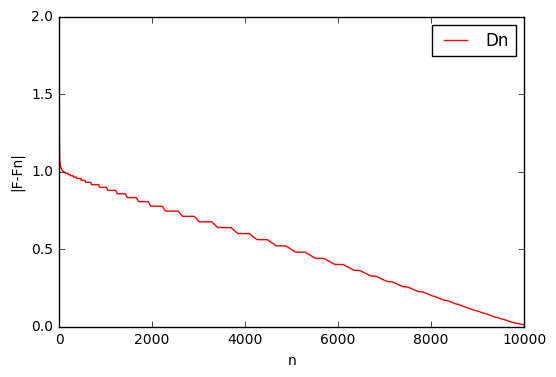

In [35]:
# Зависимости Dn от n
plt.plot(range(1, N+1), res, color = 'red', label='Dn')
plt.legend(loc='best')
plt.xlabel('n')    
plt.ylabel('|F-Fn|');
plt.show()

In [36]:
tmp = []
for i in range(1, N+1):
    tmp += [sqrt(i)]
res = np.array(res) * np.array(tmp)

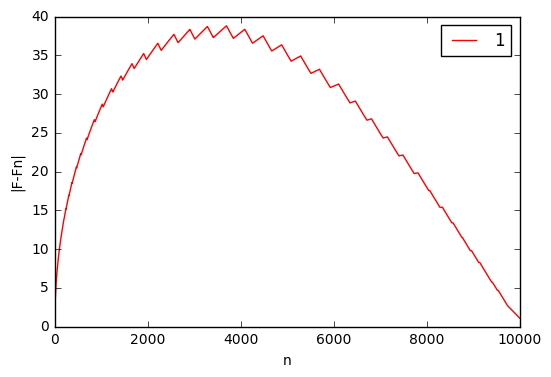

In [37]:
# Зависимость n^(1/2) * Dn от n
plt.plot(range(1, N+1), res, color = 'red', label='1')
plt.legend(loc='best')
plt.xlabel('n')    
plt.ylabel('|F-Fn|');
plt.show()